<a href="https://colab.research.google.com/github/LatiefDataVisionary/android-apps-market-research/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Import Libraries & Setup Environment**

**a. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**b. Config**

In [2]:
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## **2. Load Dataset**

**a. Load from Google Drive (Colab)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**b. Load Dataset**

In [4]:
path = "/content/drive/MyDrive/play store 2023 dataset/Google-Playstore.csv"
df = pd.read_csv(path)

## **3. Data Preprocessing**

### **a. Basic Data Inspection**

In [5]:
display(df.head(10))

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46M,6.0 and up,Imocci GmbH,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,USD,2.5M,4.1 and up,android developer779,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,USD,16M,5.0 and up,Mozaix LLC,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,USD,1.3M,4.4 and up,Yilver Molina Hurtatiz,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,USD,3.5M,4.1 and up,Free 2021 Themes for Emoji keyboard,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [7]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [8]:
df.describe(include='object')

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Scraped Time
count,2312939,2312944,2312944,2312837,2312809,2312748,2306414,2312911,1552109,2312913,2241891,2312944,2312944,1891991,2312944
unique,2177943,2312944,48,22,15,1657,154,758371,810440,950456,4158,3918,6,977743,67374
top,Tic Tac Toe,jp.abt.lopnur.gearratiocalc,Education,100+,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Jun 16, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,2021-06-16 07:35:57
freq,382,1,241090,443368,2311548,74777,604465,5422,7519,10345,2051,11186,2022089,7481,56


In [9]:
df.describe(include=['O']).T

,count,unique,top,freq
App Name,2312939,2177943,Tic Tac Toe,382
App Id,2312944,2312944,jp.abt.lopnur.gearratiocalc,1
Category,2312944,48,Education,241090
Installs,2312837,22,100+,443368
Currency,2312809,15,USD,2311548
Size,2312748,1657,Varies with device,74777
Minimum Android,2306414,154,4.1 and up,604465
Developer Id,2312911,758371,Subsplash Inc,5422
Developer Website,1552109,810440,http://www.subsplash.com/,7519
Developer Email,2312913,950456,support@classplus.co,10345


### **b. Missing Value Analysis**

**1). Calculate missing values per column**

In [10]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.concat([missing, missing_pct], axis=1)
missing_report.columns = ['Missing Count', '% Missing']
missing_report = missing_report[missing_report['Missing Count'] > 0]

missing_report.sort_values('% Missing', ascending=False)

,Missing Count,% Missing
Developer Website,760835,32.894657
Privacy Policy,420953,18.199879
Released,71053,3.071972
Rating Count,22883,0.989345
Rating,22883,0.989345
Minimum Android,6530,0.282324
Size,196,0.008474
Currency,135,0.005837
Installs,107,0.004626
Minimum Installs,107,0.004626


**2). Handle missing values with column-specific treatment**


Columns with >5% missing values (High Priority)


In [11]:
# Developer Website (32.89% missing) - Fill with "Not Provided"
df['Developer Website'].fillna('Not Provided', inplace=True)

<ipython-input-11-1293c342e004>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Developer Website'].fillna('Not Provided', inplace=True)


In [12]:
# Privacy Policy (18.2% missing) - Fill with "Not Specified"
df['Privacy Policy'].fillna('Not Spesified', inplace=True)

<ipython-input-12-182dc19e3f3d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Privacy Policy'].fillna('Not Spesified', inplace=True)


In [13]:
# Released (3.07% missing) - Fill with median year
release_year = pd.to_datetime(df['Released'], errors='coerce').dt.year
median_year = release_year.dropna().median()
median_year = int(median_year)
df['Released'] = df['Released'].fillna(str(median_year))

Columns with 0.1-5% missing values (Medium Priority)


In [14]:
# Rating Count (0.99% missing) - Fill with 0 (assuming no ratings yet)
df['Rating Count'].fillna(0, inplace=True)

<ipython-input-14-d305054068cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating Count'].fillna(0, inplace=True)


In [15]:
# Rating (0.99% missing) - Fill with category median
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

In [16]:
# Minimum Android (0.28% missing) - Fill with mode
df['Minimum Android'].fillna(df['Minimum Android'].mode()[0], inplace=True)

<ipython-input-16-bf6565b3bd48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Minimum Android'].fillna(df['Minimum Android'].mode()[0], inplace=True)


Columns with <0.1% missing values (Low Priority)


In [17]:
# Size (0.008% missing) - Fill with mode
df['Size'].fillna(df['Size'].mode(), inplace=True)

<ipython-input-17-966b0c4b1ef1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].mode(), inplace=True)


In [18]:
# Currency (0.006% missing) - Fill with "USD" (default assumption)
df['Currency'].fillna('USD', inplace=True)

<ipython-input-18-67d1aac6179c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Currency'].fillna('USD', inplace=True)


In [19]:
# Installs & Minimum Installs (0.005% missing) - Fill with 0
df['Installs'].fillna(0, inplace=True)
df['Minimum Installs'].fillna(0, inplace=True)

<ipython-input-19-adf0996a0d36>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Installs'].fillna(0, inplace=True)
<ipython-input-19-adf0996a0d36>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [20]:
# Developer Id (0.001% missing) - Fill with "unknown_developer"
df['Developer Id'].fillna('unknown_developer', inplace=True)

<ipython-input-20-f65ff186e8c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Developer Id'].fillna('unknown_developer', inplace=True)


In [21]:
# Developer Email (0.001% missing) - Fill with "no_email_provided"
df['Developer Email'].fillna('no_email_provided', inplace=True)

<ipython-input-21-f5828682c1fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Developer Email'].fillna('no_email_provided', inplace=True)


In [22]:
# App Name (0.0002% missing) - Drop rows (extremely few cases)
df.dropna(subset=['App Name'])

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,Not Provided,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,Not Spesified,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,2019,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,Not Provided,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


### **3.2. Data Type Conversion & Cleaning**

**3.2.1. Convert 'Size' to numeric (MB)**

In [23]:
df['Size'] = (
    df['Size'].str.replace('M', '') # Remove 'M' for Megabytes
              .str.replace('k', '') # Remove 'k' (will convert kB to MB later)
              .str.replace('G', '') # Remove 'G' for Gigabytes added this line
              .str.replace(',', '') # Remove commas before converting to float
              .str.replace('.', '') # Remove dots before converting to float
              .replace('Varies with device', np.nan) # Handle special cases
              .astype(float) # Convert to float
)

In [24]:
# Convert kB to MB (1 MB = 1024 kB)
df.loc[df['Size'] > 100, 'Size'] = df['Size'] / 1024
display(df['Size'].describe())

,Size
count,2.237971e+06
mean,4.008074e+01
std,2.506928e+01
min,9.863281e-02
25%,1.900000e+01
50%,3.500000e+01
75%,5.700000e+01
max,1.000000e+02


**3.2.2. Convert `Installs`, `Minimum Install`, `Maximum Installs` to numeric**

In [25]:
df['Installs'] = (
    df['Installs'].astype(str) # Convert 'Installs' column to string type
                  .str.replace('+', '') # Remove '+' suffix
                  .str.replace(',', '') # Remove thousans separator
                  .str.replace('Free', '0') # Replace 'Free' with '0' to make it numeric
                  .fillna(0)
                  .astype(int)
)

display(df['Installs'].describe())

,Installs
count,2.312944e+06
mean,1.834367e+05
std,1.513109e+07
min,0.000000e+00
25%,5.000000e+01
50%,5.000000e+02
75%,5.000000e+03
max,1.000000e+10


In [26]:
df['Minimum Installs'] = pd.to_numeric(df['Minimum Installs'], errors='coerce').astype('Int64')
display(df['Minimum Installs'].describe())

,Minimum Installs
count,2312944.0
mean,183436.727528
std,15131089.106248
min,0.0
25%,50.0
50%,500.0
75%,5000.0
max,10000000000.0


In [27]:
df['Maximum Installs'] = pd.to_numeric(df['Maximum Installs'], errors='coerce').astype('Int64')
display(df['Maximum Installs'].describe())

,Maximum Installs
count,2312944.0
mean,320201.713137
std,23554954.886548
min,0.0
25%,84.0
50%,695.0
75%,7354.0
max,12057627016.0


**3.2.3. Convert `Price` to numeric (USD)**

In [28]:
df['Price'] = (
    df['Price'].astype(str) # Convert 'Price' column to string type
    .str.replace('$', '')  # Remove dollar sign
    .astype(float)
)

display(df['Price'].describe())

,Price
count,2.312944e+06
mean,1.034992e-01
std,2.633127e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.000000e+02


**3.2.4. Convert date columns to datetime**

In [29]:
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')  # Handle invalid dates
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

display(df[['Released', 'Last Updated']].dtypes)

,0
Released,datetime64[ns]
Last Updated,datetime64[ns]


## **4. Feature Engineering**

### **4.1. Create size categories**

In [30]:
df['Size_Category'] = pd.cut(df['Size'],
                           bins=[0, 10, 50, 100, np.inf],
                           labels=['Tiny (<10MB)', 'Small (10-50MB)', 'Medium (50-100MB)', 'Large (>100MB)'])

display(df['Size_Category'].value_counts())

,count
Size_Category,
Small (10-50MB),1445108
Medium (50-100MB),696934
Tiny (<10MB),95929
Large (>100MB),0


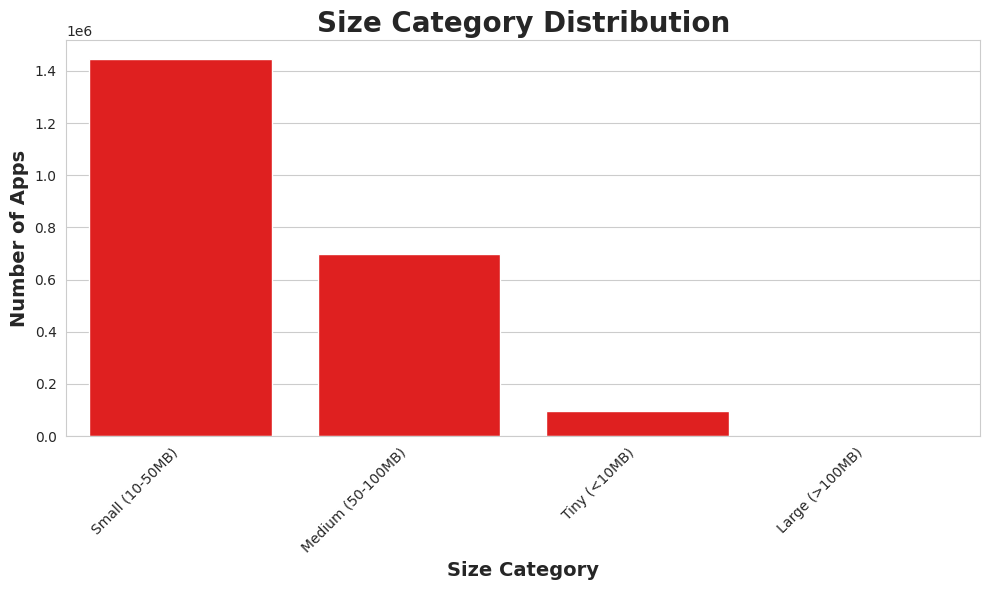

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Size_Category', data=df, order=df['Size_Category'].value_counts().index, color='r')
plt.title('Size Category Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Size Category', fontweight='bold', fontsize=14)
plt.ylabel('Number of Apps', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Checking the total size category of which is above 100MB

In [32]:
large_apps = df[df['Size_Category'] == 'Large (>100MB)']
num_large_apps = len(large_apps)
print(f"Number of large apps: {num_large_apps}")

Number of large apps: 0


Checkin fonts available in matplotlib

In [33]:
import matplotlib.font_manager

# Get a list of available font families
font_families = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

for font in font_families:
  print(font)

/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf
/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf
/usr/share/fonts/truetype/li

### **4.2. Create Price Tiers**

In [34]:
df['Price_Tiers'] = pd.cut(df['Price'],
                           bins=[-1, 0, 1, 5, 10, np.inf],
                           labels=['Frree', 'Budgedt ($0-1)',
                                   'Standard ($1-5)', 'Premium ($5-10)', 'Expensive ($10+)'])

display(df['Price_Tiers'].value_counts())

,count
Price_Tiers,
Frree,2268011
Standard ($1-5),24573
Budgedt ($0-1),12110
Premium ($5-10),5308
Expensive ($10+),2942


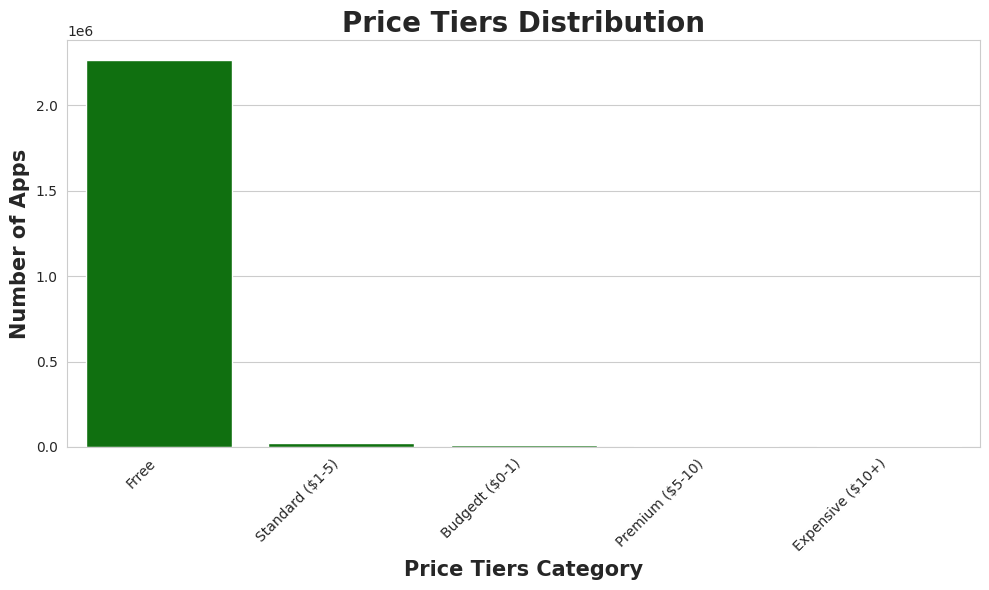

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_Tiers', data=df, order=df['Price_Tiers'].value_counts().index, color='g')
plt.title('Price Tiers Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Price Tiers Category', fontweight='bold', fontsize=15)
plt.ylabel('Number of Apps', fontweight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **4.3. Extract year from dates**

In [36]:
df['Release_Year'] = df['Released'].dt.year
df['Updated_Year'] = df['Last Updated'].dt.year
display(df[['Release_Year', 'Updated_Year']])

,Release_Year,Updated_Year
0,2020.0,2020
1,2020.0,2021
2,2019.0,2019
3,2018.0,2018
4,2020.0,2018
...,...,...
2312939,NaN,2021
2312940,2018.0,2018
2312941,2018.0,2018
2312942,2016.0,2021


In [37]:
display(df[['Release_Year', 'Updated_Year']].describe())

,Release_Year,Updated_Year
count,2.241891e+06,2.312944e+06
mean,2.018169e+03,2.019458e+03
std,2.146142e+00,1.575108e+00
min,2.010000e+03,2.009000e+03
25%,2.017000e+03,2.019000e+03
50%,2.019000e+03,2.020000e+03
75%,2.020000e+03,2.021000e+03
max,2.021000e+03,2.021000e+03


# **5. Outlier Detection**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [39]:
# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

In [40]:
# Helper function for formatting
def millions_formatter(x, pos):
  return f'{x/1e6:.0f}M'

## **5.1. Rating Outliers (should be 1-5)**

In [41]:
# Convert 'Rating' column to numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [42]:
rating_outliers = df[(df['Rating'] < 1) | (df['Rating'] > 5)]
print(f'⚠️  Found {len(rating_outliers)} rating outliers (outside 1-5 range)')

⚠️  Found 1066879 rating outliers (outside 1-5 range)


Text(3, 0.5, 'Outliers: 1066879')

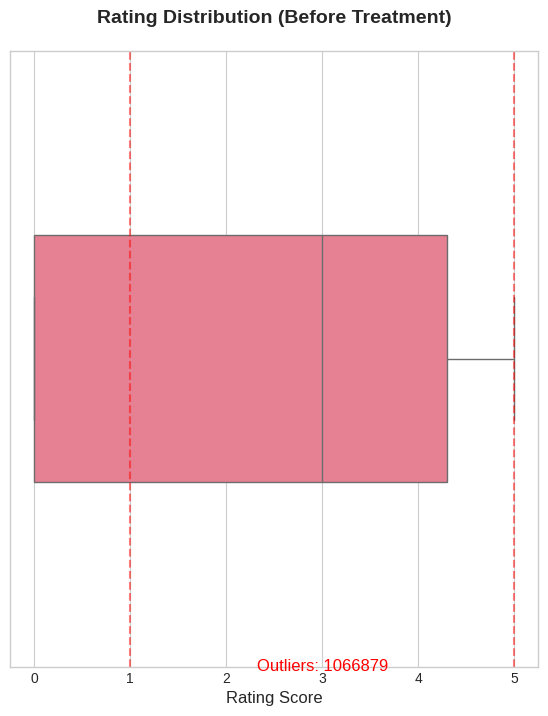

In [43]:
plt.figure(figsize=(15, 8))

# Before treatement
plt.subplot(1, 2, 1)
rating_before = df['Rating'].copy()
sns.boxplot(x=rating_before, width=0.4)
plt.title('Rating Distribution (Before Treatment)\n', fontsize=14, fontweight='bold')
plt.xlabel('Rating Score', fontsize=12)
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=5, color='r', linestyle='--', alpha=0.5)
plt.text(3, 0.5, f'Outliers: {len(rating_outliers)}', ha='center', va='center', fontsize=12, color='r')

In [44]:
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)] #Remove ourliers

In [45]:
rating_outliers = df[(df['Rating'] < 1) | (df['Rating'] > 5)]

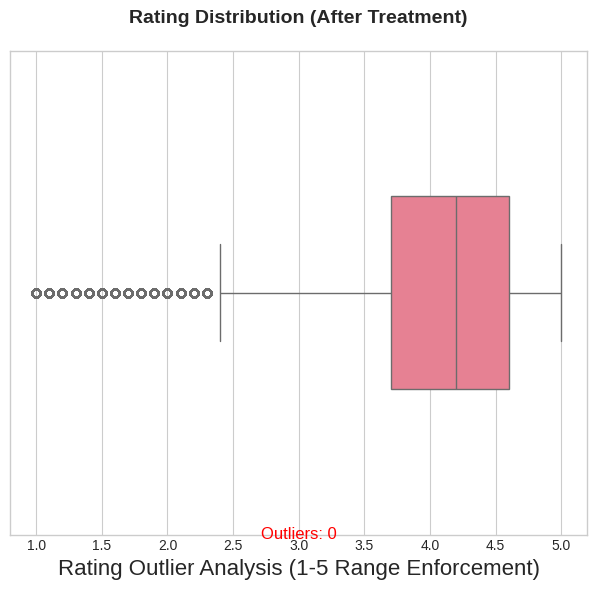

In [46]:
# After treatment
plt.subplot(1,2,2)
rating_after = df['Rating'].clip(1, 5)
sns.boxplot(x=rating_after, width=0.4)
plt.title('Rating Distribution (After Treatment)\n', fontsize=14, fontweight='bold')
plt.xlabel('Rating Outlier Analysis (1-5 Range Enforcement)', y=1.02, fontsize=16)
plt.tight_layout()
plt.text(3, 0.5, f'Outliers: {len(rating_outliers)}', ha='center', va='center', fontsize=12, color='r')
plt.show()

## **5.2. Price ourliers (top 1%)**

In [47]:
price_treshold = df['Price'].quantile(0.99)
price_outliers = df[df['Price'] > price_treshold]
print(f' Found {len(price_outliers)} price outliers (>${price_treshold:.2f})')

 Found 11717 price outliers (>$2.49)


Text(2.7390000000000003, 0.5, 'Treshold: $2.49\nOutliers: 11717')

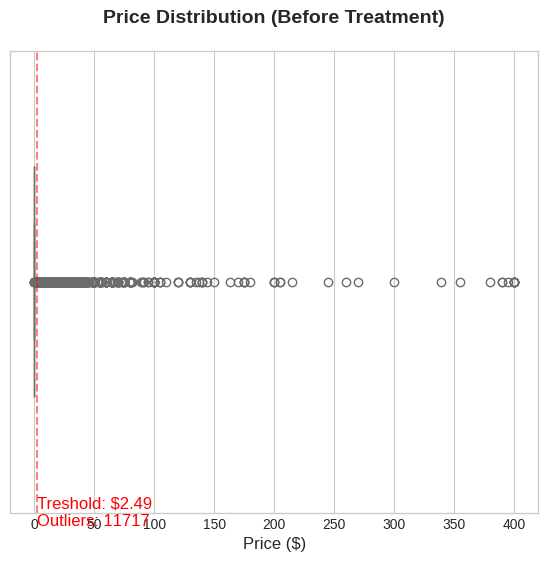

In [48]:
plt.figure(figsize=(15, 6))

# Before treatment
plt.subplot(1, 2, 1)
price_before = df['Price'].copy()
sns.boxplot(x=price_before, width=0.5)
plt.title('Price Distribution (Before Treatment)\n', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.axvline(x=price_treshold, color='r', linestyle='--', alpha=0.5)
plt.text(price_treshold*1.1, 0.5,
         f'Treshold: ${price_treshold:.2f}\nOutliers: {len(price_outliers)}',
         ha='left', va='center', fontsize=12, color='r')

In [56]:
# After treatment (winsorization)
price_after = np.where(df['Price'] > price_treshold, price_treshold, df['Price'])

In [57]:
# Calculate outliers after winsorization
price_outliers_after = price_after[price_after > price_treshold]
print(f'Found {len(price_outliers_after)} price outliers (>${price_treshold:.2f})')

Found 0 price outliers (>$2.49)


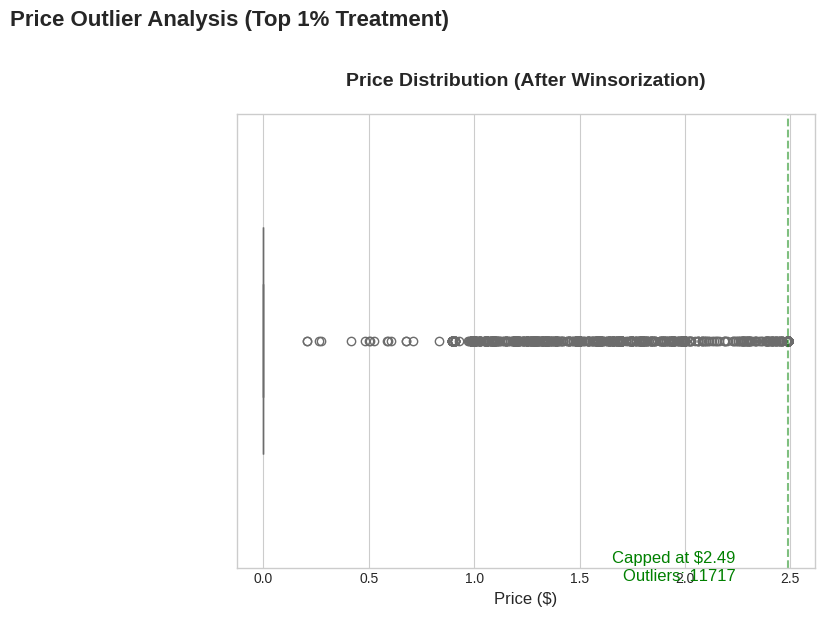

In [54]:
# After treatment (log scale for better visibility)
plt.subplot(1, 2, 2)
sns.boxplot(x=price_after, width=0.5)
plt.title('Price Distribution (After Winsorization)\n', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.axvline(x=price_treshold, color='g', linestyle='--', alpha=0.5)
plt.text(price_treshold*0.9, 0.5,
         f'Capped at ${price_treshold:.2f}\nOutliers: {len(price_outliers)}',
         ha='right', va='center', fontsize=12, color='g'
         )
plt.suptitle('Price Outlier Analysis (Top 1% Treatment)', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## **5.3. Install outliers (top1%)**\



In [ ]:
install_treshold = df['Installs'].quantile(0.99)
install_outliers = df[df['Installs'] > install_treshold]
print(f'Found {len(install_outliers)} install outliers (>{install_treshold:,})')

In [ ]:
minimum_install_treshold = df['Minimum Installs'].quantile(0.99)
minimum_install_outliers = df[df['Minimum Installs'] > minimum_install_treshold]
print(f'Found {len(minimum_install_outliers)} minimum install outliers (>{minimum_install_treshold:,})')

In [ ]:
maximum_install_treshold = df['Maximum Installs'].quantile(0.99)
maximum_install_outliers = df[df['Maximum Installs'] > maximum_install_treshold]
print(f'Found {len(maximum_install_outliers)} maximum install outliers (>{maximum_install_treshold:,})')